<b>```LSTMs EXPLAINED```</b>

><li>This notebook tried to bridge the gap between the theoretical and practical implementation of LSTM.</li>
><li>The theoretical explaination of LSTMs can be found here -> 
<a href="https://colah.github.io/posts/2015-08-Understanding-LSTMs/">LSTM COLAH BLOG</a>.</li>
><li>The above link gives best possible theoretical explaination of LSTMs.</li>

In this notebook,
><li>I try to explain the dimensions of the various gates,outputs and the cell states involed in LSTMs using an example.</li>
><li>I try to explain the dimensions of the various weights matrices involved in LSTMs and parameters learnt by it.</li>
><li>I also try to explain the parameters that affects the LSTM outputs like "units" , "return_states" and "return_sequences" with help of example sequence.</li>

In [36]:
import numpy as np
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Embedding,Dense,Bidirectional,LSTM,GRU,Input
from tensorflow.keras.utils import plot_model
from IPython.display import Image 
from keras.preprocessing.text import Tokenizer

Fitting the tokenizer on simple corpus

In [37]:
tokens = Tokenizer()                                                   #declare object of Tokenizer class
tokens.fit_on_texts(["He is a good boy","She is a bad girl","He is a good boy"])  #fit on text corpus

In [38]:
tokens.word_index

{'is': 1, 'a': 2, 'he': 3, 'good': 4, 'boy': 5, 'she': 6, 'bad': 7, 'girl': 8}

```Test Example```
>We use a simple example sequence of 5 words i.e. 5 timestamps.

In [119]:
encoded_sen=tokens.texts_to_sequences(["He is a bad boy"])
print(len(encoded_sen[0]),encoded_sen[0])

5 [3, 1, 2, 7, 5]


<b>Here is how our data looks like in encoding form<b>

In [112]:
data=np.array(encoded_sen).reshape((1,5,1))
type(data)

numpy.ndarray

In [123]:
import tensorflow as tf
data=tf.reshape(encoded_sen,(1,5,1))
data

<tf.Tensor: shape=(1, 5, 1), dtype=int32, numpy=
array([[[3],
        [1],
        [2],
        [7],
        [5]]], dtype=int32)>

<b>```RNN```</b>
<ul><li>
Recurrent neural networks are a type of neural network where outputs from previous time steps are taken as inputs for the current time step.</li>


<img src="RNN.png"  />
    
 <li>
we can see that the network takes both the output of the network from the previous time step as input and uses the internal state from the previous time step as a starting point for the current time step.</li><ul>

<b>```LSTM```</b>
<li>Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies.</li>
> Read more about LSTM from this link:
<a href="https://colah.github.io/posts/2015-08-Understanding-LSTMs/">LSTM Colah Blog </a>
   
   <img src="LSTM_rnn.png" />
 

<ul><li>Here, <b>T<sub>x</sub> =5</b> . Each word of our seqeunce is passed from LSTM cell and vector <b>"```c```"</b> and <b>"```a```"</b> are generated.</li><li> The <b>"```c```"</b>  vector denotes the context information being passed from one LSTM cell to another.</li> <li> The <b>"```a```"</b> vector denotes the output generated from each cell.</li></ul>

# Simple LSTM

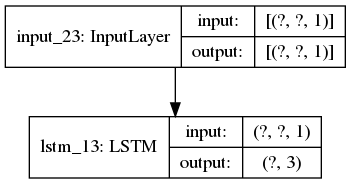

In [121]:
inputs1 = Input(shape=(None,1))
lstm1 = LSTM(units=3)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image('model.png')

<li>
    Each LSTM unit will output a vector of dimensions = units.<br>
The units parameter is also related to the dimensionality of the all the gates,cell state and outputs of cell.</br>
</li>


In [122]:
print(model.predict(data))

[[ 0.52061695  0.07725253 -0.16408208]]


<li>The above predictions contains a "3" dimensional vector for out test observations.</li>
<li>These are the output from last timestamp of the test observation. i.e. <b>```a```<sup>&lt;```5```&gt;</sup><b></li>

# LSTM weights

Let us have a look at the weight matrix of lstm layers
<img src="https://qphs.fs.quoracdn.net/main-qimg-35aed4af6522aa361ead54cb571df52a"/>

><li>F<sub>t</sub> = σ ( W<sub>f</sub> . [ H<sub>t−1</sub> , X<sub>t</sub> ] + B<sub>f</sub>) = σ ( W<sub>hf</sub> . H<sub>t−1</sub> + W<sub>xf</sub> . X<sub>t</sub> + B<sub>f</sub> )</li>

><li>I<sub>t</sub> = σ ( W<sub>f</sub> . [ H<sub>t−1</sub> , X<sub>t</sub> ] + B<sub>i</sub>) = σ ( W<sub>hi</sub> . H<sub>t−1</sub> + W<sub>xi</sub> . X<sub>t</sub> + B<sub>i</sub> )</li>

><li>&#126;C<sub>t</sub> = tanh ( W<sub>c</sub> . [ H<sub>t−1</sub> , X<sub>t</sub> ] + B<sub>c</sub>) = tanh ( W<sub>hc</sub> . H<sub>t−1</sub> + W<sub>xc</sub> . X<sub>t</sub> + B<sub>c</sub> )</li>

><li>O<sub>t</sub> = σ ( W<sub>o</sub> . [ H<sub>t−1</sub> , X<sub>t</sub> ] + B<sub>o</sub>) = σ ( W<sub>ho</sub> . H<sub>t−1</sub> + W<sub>xo</sub> . X<sub>t</sub> + B<sub>o</sub> ) </li>



><li>C<sub>t</sub> = F<sub>t</sub> ∗ C<sub>t−1</sub> + I<sub>t</sub> ∗ &#126;C<sub>t</sub></li>
><li>H<sub>t</sub> = O<sub>t</sub> ∗ tanh ( C<sub>t</sub> )</li>



Dimension of the variables used.
><li> <b>F<sub>t</sub></b> is a vector of size 1 x 3 with values ranging from 0 to 1.</li>
><li><b>I<sub>t</sub></b> is a vector of size 1 x 3 with values ranging from 0 to 1.</li>
><li><b>&#126;C<sub>t</sub></b> is a vector of size 1 x 3 with values ranging from -1 to 1.</li>
><li><b>O<sub>t</sub></b> is a vector of size 1 x 3 with values ranging from 0 to 1.</li>

<b> Input-Gates Weight Matrix</b><br> 
Connection between <b>input dimensions</b> and different Gates. 
><li><b>W<sub>xf</sub></b> represents connection between input dimension and forget gate. i.e. 1 &#42; 3</li>
><li><b>W<sub>xi</sub></b> represents connection between input dimension and input gate. i.e. 1 &#42; 3</li>
><li><b>W<sub>xc</sub></b> represents connection between input dimension and update gate. i.e. 1 &#42; 3</li>
><li><b>W<sub>xo</sub></b> represents connection between input dimension and output gate. i.e. 1 &#42; 3</li>

Connections between input dimension to gates can be concatenated into a 1 * 12 vector.

Check below,

In [77]:
print(model.layers[1].get_weights()[0].shape)

(1, 12)


<b> Output-Gates Weight Matrix</b><br> 
Connection between <b>output dimensions</b> and different Gates. 
><li><b>W<sub>hf</sub></b> represents connection between output dimension and forget gate. i.e. 3 &#42; 3.</li>
><li><b>W<sub>hi</sub></b> represents connection between output dimension and input gate. i.e. 3 &#42; 3.</li>
><li><b>W<sub>hc</sub></b> represents connection between output dimension and update gate. i.e. 3 &#42; 3.</li>
><li><b>W<sub>ho</sub></b> represents connection between output dimension and output gate. i.e. 3 &#42; 3.</li>

Connections between output dimension to gates can be concatenated into a 3 * 12 vector.

Check below,

In [78]:
print(model.layers[1].get_weights()[1].shape)

(3, 12)


<b> Bias Matrix</b> 
><li><b>B<sub>f</sub></b> is a vector of length 3.</li>
><li><b>B<sub>i</sub></b> is a vector of length 3.</li>
><li><b>B<sub>c</sub></b> is a vector of length 3.</li>
><li><b>B<sub>o</sub></b> is a vector of length 3.</li>

The Biases can be summarised into a vector of length 12.

Check below,

In [79]:
print(model.layers[1].get_weights()[2].shape)

(12,)


```Total Parameters learnt``` = 1 X 12 + 3 X 12 + 12 =60

Check below

In [80]:
model.summary()

Model: "functional_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, None, 1)]         0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 3)                 60        
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


# LSTM with Return Sequences=TRUE

><li>useful in many cases like stacking LSTMs etc.</li>
><li>By default , this parameter is set to <b>False</b>.</li>

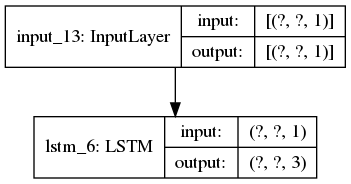

In [81]:
lstm1 = LSTM(3,return_sequences=True)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image('model.png')

In [83]:
print(model.predict(data))

[[[-0.15186618  0.32469437  0.12867232]
  [-0.22093055  0.268203    0.25010505]
  [-0.29267725  0.33245826  0.25878197]
  [-0.3528403   0.5575096   0.06633353]
  [-0.39980075  0.5508986   0.13358133]]]


Now, our output is a matrix of 1 &#42; 5 &#42; 3 dimensions. 
><li>The first row corresponds to <b>```a```<sup>&lt;```1```&gt;</sup></b>.</li>
><li>The second row corresponds to <b>```a```<sup>&lt;```2```&gt;</sup></b>.</li>
><li>The third row corresponds to <b>```a```<sup>&lt;```3```&gt;</sup></b>.</li>
><li>The fourth row corresponds to <b>```a```<sup>&lt;```4```&gt;</sup></b>.</li>
><li>The fifth row corresponds to <b>```a```<sup>&lt;```5```&gt;</sup></b>.</li>


# LSTM with Return States = TRUE
><li>Cell state correpsonds to <b>C <sup>&lt;Tx&gt;</sup></b> in the diagram .<br></li>
><li>The cell state is passed from one LSTM cell to another and is reponsible for learning long-term dependencies.<br></li>
><li>returned states can be used  to initialized with the cell state of another layers,e.g. an encoder-decoder model.</li>
><li>By default , this parameter is set to <b>False</b>.</li>

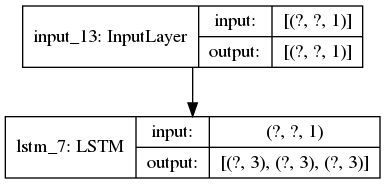

In [84]:
lstm1 = LSTM(3,return_state=True)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image('model.png')

In [85]:
_,_,cell_state=model.predict(data)
print(cell_state)

[[-2.0118687  -1.5934069   0.20593193]]


In [86]:
model.predict(data)

[array([[-0.14635403, -0.15192625,  0.05820853]], dtype=float32),
 array([[-0.14635403, -0.15192625,  0.05820853]], dtype=float32),
 array([[-2.0118687 , -1.5934069 ,  0.20593193]], dtype=float32)]

In [87]:
a,b,cell_state=model.predict(data)
print(a.shape,b.shape,cell_state)

(1, 3) (1, 3) [[-2.0118687  -1.5934069   0.20593193]]


<li>For our test observation, the cell state is a vector of length 3 units.</li>

<li>It corresponds to cell_state from the last timestamp.</li> 

<li>This corresponds to <b>```C```<sup>&lt;```5```&gt;</sup></b> in our data.</li>

# LSTM with Return States = TRUE  and Return Sequences = TRUE 

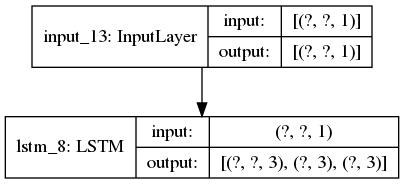

In [88]:
lstm1 = LSTM(3,return_state=True,return_sequences=True)(inputs1)
model = Model(inputs=inputs1, outputs=lstm1)
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image('model.png')

In [89]:
seq_output,lstm_output,cell_state=model.predict(data)
print(seq_output)
print("\n")
print(lstm_output)
print("\n")
print(cell_state)

[[[-0.41338167 -0.15691943 -0.2797016 ]
  [-0.39712286 -0.15880443 -0.20981514]
  [-0.55528235 -0.27059194 -0.2451846 ]
  [-0.7026329  -0.52687716 -0.28858808]
  [-0.71129465 -0.628194   -0.2655347 ]]]


[[-0.71129465 -0.628194   -0.2655347 ]]


[[-0.9336177  -0.81564534 -0.84933513]]


><li>seq_output is the hidden state for each input time step.</li>

><li>lstm_output is the hidden state output for the last time step.</li>

><li>cell_state is the cell state for the last input time step.</li>




<b>The Output from the last time stamp ```a```<sup>&lt;```5```&gt;</sup> in seq_output is same as the output of default lstm_output.<b>

Check below,

In [90]:
print(seq_output[:,-1,:])
print("\n")
print(lstm_output)

[[-0.71129465 -0.628194   -0.2655347 ]]


[[-0.71129465 -0.628194   -0.2655347 ]]


# GRU

> <img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-GRU.png" />
><li>It combines the forget and input gates into a single “update gate.” </li>
><li>It also merges the cell state and hidden state, and makes some other changes.</li>

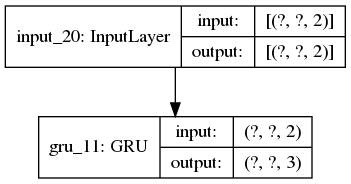

In [106]:
inputs1 = Input(shape=(None,2))
gru = GRU(3,return_sequences=True)(inputs1)
gru_model = Model(inputs=inputs1, outputs=gru)
plot_model(gru_model, show_shapes=True, show_layer_names=True, to_file='GRU.png')
Image('GRU.png')

In [107]:
print(gru_model.layers[1].get_weights()[0].shape)
print(gru_model.layers[1].get_weights()[1].shape)
print(gru_model.layers[1].get_weights()[2].shape)

(2, 9)
(3, 9)
(2, 9)


```Total Parameters learnt``` = 2 X 9 + 3 X 9 + 2 X 9 = 63

Check below

In [108]:
gru_model.summary()

Model: "functional_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, None, 2)]         0         
_________________________________________________________________
gru_11 (GRU)                 (None, None, 3)           63        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


# BIDIRECTIONAL GRU

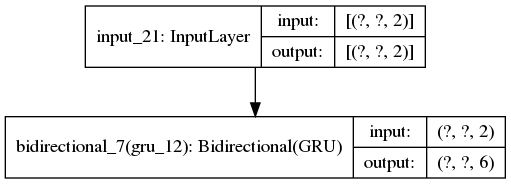

In [109]:
inputs1 = Input(shape=(None,2))
bi_gru = Bidirectional(GRU(3,return_sequences=True))(inputs1)
bi_gru_model = Model(inputs=inputs1, outputs=bi_gru)
plot_model(bi_gru_model, show_shapes=True, show_layer_names=True, to_file='GRU.png')
Image('GRU.png')

In [110]:
for i,layer in enumerate(bi_gru_model.layers):
    for j in  bi_gru_model.layers[i].get_weights():
        print(j.shape)

(2, 9)
(3, 9)
(2, 9)
(2, 9)
(3, 9)
(2, 9)


```Total Parameters learnt``` = 2 * (2 X 9 + 3 X 9 + 2 X 9 )= 126

Check below

In [111]:
bi_gru_model.summary()

Model: "functional_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, None, 2)]         0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, None, 6)           126       
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


# BIDIRECTIONAL LSTM

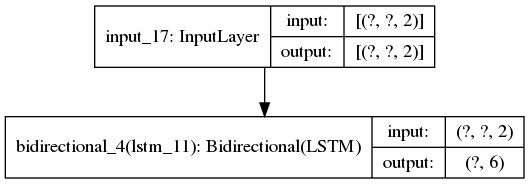

In [100]:
inputs1 = Input(shape=(None,2))              # Input Layer with 2 dimensions
bi_lstm = Bidirectional(LSTM(3))(inputs1)
bi_lstm_model = Model(inputs=inputs1, outputs=bi_lstm)
plot_model(bi_lstm_model, show_shapes=True, show_layer_names=True, to_file='model.png')
Image('model.png')

In [101]:
for i,layer in enumerate(bi_lstm_model.layers):
    for j in  bi_lstm_model.layers[i].get_weights():
        print(j.shape)

(2, 12)
(3, 12)
(12,)
(2, 12)
(3, 12)
(12,)


```Total Parameters learnt``` = 2 * ( 2 X 12 + 3 X 12 + 12 ) = 144

Check below

In [99]:
bi_lstm_model.summary()

Model: "functional_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        [(None, None, 2)]         0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 6)                 144       
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


# Peephole Connections

><img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-peepholes.png" />
><li>we let the gate layers look at the cell state. </li>

# coupled forget and input gates
><img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-var-tied.png" />
><li>Instead of separately deciding what to forget and what we should add new information to, we make those decisions together.</li>
><li>We only forget when we’re going to input something in its place.</li>
><li>We only input new values to the state when we forget something older.</li>

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;```END!```